# Names!
I found a dataset on the evolution of human names since the 1900s. I also found some data on dog names in NYC since last year. I had two questions: 
1. Are we naming our kids in more unique ways today, vs 20 years ago? 
2. What are the past trends in the most popular dog names? Are they popular human names?

In [1]:
import pandas as pd, numpy as np

In [2]:
df_dogs = pd.read_csv('./dogNames2.csv')

In [3]:
df_humans = pd.read_csv('./NationalNames.csv')

In [6]:
df_humans.tail(5)

,Id,Name,Year,Gender,Count
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [8]:
df_dogs.tail(5)

,Row_Labels,Count_AnimalName
16215,37916,1
16216,38282,1
16217,38583,1
16218,38948,1
16219,39743,1


I'm trying to predict relative, not absolute, frequencies of names. I'll have to divide out the total number of names per year.

In [38]:
kids_per_year = pd.DataFrame(df_humans[['Year', 'Count']].groupby('Year').sum()).reset_index()

In [26]:
df_humans_npy = pd.merge(kids_per_year, df_humans, on='Year', how='right')

In [30]:
df_humans_npy['Count_pct'] = 100*df_humans_npy['Count_y']/df_humans_npy['Count_x']

In [31]:
df_humans_npy.head(3)

,Year,Count_x,Id,Name,Gender,Count_y,Count_pct
0,1880,201484,1,Mary,F,7065,3.506482
1,1880,201484,2,Anna,F,2604,1.292410
2,1880,201484,3,Emma,F,2003,0.994124


Have we gotten more creative with names?

In [34]:
#get number of names per person per year.
names_per_year = pd.DataFrame(df_humans[['Year', 'Id']].groupby('Year').count()).reset_index()

In [37]:
names_per_year.columns=[['Year', 'Names']]

In [39]:
kids_names_py = pd.merge(names_per_year, kids_per_year, on='Year')
kids_names_py.head(5)

,Year,Names,Count
0,1880,2000,201484
1,1881,1935,192699
2,1882,2127,221538
3,1883,2084,216950
4,1884,2297,243467


In [40]:
kids_names_py['Names_per_1000_kids']=1000*kids_names_py.Names/kids_names_py.Count

In [42]:
kids_names_py.head(3)

,Year,Names,Count,Names_per_1000_kids
0,1880,2000,201484,9.926347
1,1881,1935,192699,10.041567
2,1882,2127,221538,9.601062


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

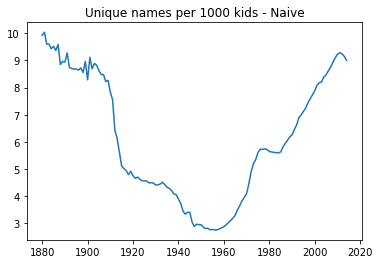

In [48]:
x=kids_names_py.Year
y=kids_names_py.Names_per_1000_kids
plt.plot(x,y)
plt.title('Unique names per 1000 kids - Naive')

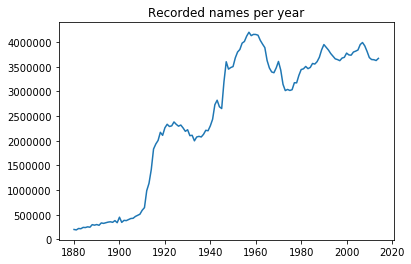

In [46]:
x=kids_names_py.Year
y=kids_names_py.Count
plt.plot(x,y)
plt.title('Recorded names per year')

Unfortunately, this isn't very informative since it seems to be mostly picking up how many people there are. It's easier to have a bunch of unique names when noone's come up with any names yet. You would expect to have more unique names per person in a population of 10 vs one of 100, for example, even if both populations are equally hipster. The real question I want to answer is: if we take 100 people at random today vs 100 years ago, how many different names will they have? Let's try entropy (a measure of disorder)

In [53]:
import scipy.stats

In [68]:
#entropy = sum of prob(x)*log2(prob(X)). 
df_humans_npy['Count_pct_d']=df_humans_npy.Count_pct/100
entropy=df_humans_npy[['Year','Count_pct_d']].groupby('Year').apply(scipy.stats.entropy)

In [78]:
entropy_dict={a:b[1] for a,b in zip(entropy.index, entropy.values)}
entropy_years=[a for a in entropy_dict.keys()]
entropy_vals=[b for b in entropy_dict.values()]

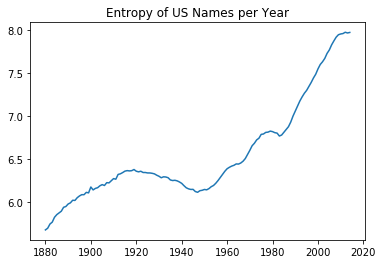

In [80]:
plt.plot(entropy_years, entropy_vals)
plt.title('Entropy of US Names per Year')

<h2> Dogs!

Get top 5 dog names to investigate

In [11]:
df_dogs.sort_values(by='Count_AnimalName', ascending=False, inplace=True)
df_dogs.head(5)

,Row_Labels,Count_AnimalName
1156,BELLA,1195
9140,MAX,1153
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


Bella

In [12]:
bella = df_humans[df_humans.Name == 'Bella']
bella

,Id,Name,Year,Gender,Count
468,469,Bella,1880,F,13
2324,2325,Bella,1881,F,24
4393,4394,Bella,1882,F,16
6526,6527,Bella,1883,F,17
8503,8504,Bella,1884,F,31
10856,10857,Bella,1885,F,25
13196,13197,Bella,1886,F,22
15564,15565,Bella,1887,F,26
17944,17945,Bella,1888,F,31
20550,20551,Bella,1889,F,37
